# Linear prediction

A random segment of a speech signal:

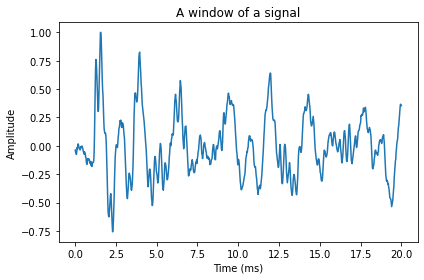

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy


# read from storage
filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)

window_length_ms = 20
window_length = int(np.round(fs*window_length_ms/1000))

n = np.linspace(0.5,window_length-0.5,num=window_length)

windowpos = np.random.randint(int((len(data)-window_length)))

datawin = data[windowpos:(windowpos+window_length)]
datawin = datawin/np.max(np.abs(datawin)) # normalize

plt.plot(n*1000/fs,datawin)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('A window of a signal')
plt.tight_layout()
plt.show()


> Look at the above segment of speech. What structures can you identify? 

Speech is a continuous signal, which means that consecutive samples of the signal are correlated. Subsequent samples of the signal are often near each other. Moreover, the degree to which samples are near each other (the '*nearness*') is roughly constant in a short segment. 

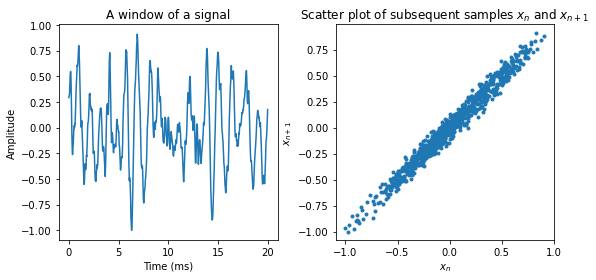

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy


# read from storage
filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)

window_length_ms = 20
window_length = int(np.round(fs*window_length_ms/1000))

n = np.linspace(0.5,window_length-0.5,num=window_length)

windowpos = np.random.randint(int((len(data)-window_length)))

datawin = data[windowpos:(windowpos+window_length)]
datawin = datawin/np.max(np.abs(datawin)) # normalize

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(n*1000/fs,datawin)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('A window of a signal')
plt.subplot(122)
plt.plot(datawin[0:-1],datawin[1:],'.')
plt.axis('equal')
plt.title('Scatter plot of subsequent samples $x_n$ and $x_{n+1}$')
plt.xlabel('$x_{n}$')
plt.ylabel('$x_{n+1}$')
plt.tight_layout()
plt.show()


In particular, if we know a previous sample $x_{n-1}$, we can make a *prediction* of the current sample, $ \hat x_n = x_{n-1}, $ such that $ \hat x_n \approx x_n. $  By using more previous samples we have more information, which should help us make a better prediction. Specifically, we can define a predictor which uses $M$ previous samples to predict the current sample $x_{n }$ as {cite}`makhoul1975linear`

$$ \hat x_n = - \sum_{k=1}^M a_k x_{n-k}. $$

This is a *linear predictor* because it takes a linearly weighted sum of past components to predict the current one.

The error of the prediction, also known as the *prediction residual* is

$$ e_n = x_n - \hat x_n = x_n + \sum_{k=1}^M a_k x_{n-k} =
\sum_{k=0}^M a_k x_{n-k} = a_n * x_n $$

where $a_{0}=1$. This explains why the definition of $\hat x_n$ included a minus sign; when we calculate the residual, the double negative disappears and we can collate everything into a single summation.

## Vector notation

Using vector notation, we can make the expressions more compact

$$ e = Xa $$

where

$$ e =
\begin{bmatrix}e_0\\e_1\\\vdots\\e_{N-1}\end{bmatrix},\qquad
X = 
\begin{bmatrix}
x_0 & x_{-1} & x_{-2} & \dots & x_{M} \\
x_1 & x_0 & x_{-1} & \dots & x_{M-1} \\ 
x_2 & x_1 & x_{0} & \dots & x_{M-2} \\ 
\vdots & \vdots & \vdots & & \vdots \\ 
x_{N-1} & x_{N-2} & x_{N-3} &\dots & x_{N-M} 
\end{bmatrix}, \qquad a =
\begin{bmatrix}a_0\\a_1\\\vdots\\a_{M}\end{bmatrix}. $$

Here we calculated the residual for a length $N$ frame of the signal.



## Parameter estimation with Minimum Mean-Square Error (MMSE)

Vector $a$ holds the unknown coefficients of the predictor. To find the
best possible predictor, we can minimize the minimum mean-square error
(MMSE). The square error is the 2-norm of the residual, $
\|e\|^2=e^T e = \sum_{k=0}^{N-1} |e_k|^2 $ . The mean of that error is defined as the
expectation

$$ E\left[|e|^2\right] = E\left[a^T X^T X a\right] = a^T
E\left[X^T X\right] a = a^T R_x a, $$

where $ R_x = E\left[X^T X\right] $ and $
E\left[\cdot\right] $ is the expectation operator. Note that, as
shown in the [autocorrelation
section](Autocorrelation_and_autocovariance.ipynb), the matrix
$R_{x}$, can be usually assumed to have a symmetric
[Toeplitz](https://en.wikipedia.org/wiki/Toeplitz_matrix) structure.

If we would directly minimize the mean-square error  $
E\left[\|e\|^2\right], $ then clearly we would obtain the
trivial solution $a=0$, which is not particularly useful. However that
solution contradicts with the requirement that the first coefficient is
unity, $a_{0}=1$. In vector notation we can equivalently write

$$ 0=a_0-1=u^T a -1,
\qquad\text{where}\,u=\begin{bmatrix}1\\0\\0\\\vdots\\0\end{bmatrix}.
$$

The standard method for quadratic minimization with constraints is to
use a [Langrange
multiplier](https://en.wikipedia.org/wiki/Lagrange_multiplier), $\lambda$, such
that the objective function is

$$ \eta(a,\lambda) = a^T R_x a - 2\lambda\left(a^T u - 1\right).
$$

This function can be heuristically interpreted such that $\lambda$ is an arbitrary, free parameter. Since our objective is to minimize $ a^T R_x a $, then if $a^T u - 1 $ is non-zero, then the objective function can become arbitrarily large. To allow any value for $\lambda$, the constraint $a^T u - 1$ must therefore be zero.

The objective function is then minimized by setting its derivative with respect to $a$ to zero

$$ 0 = \frac\partial{\partial a}\eta(a,\lambda) =
\frac\partial{\partial a} \left[a^T R_x a -2\lambda\left(a^T u -
1\right)\right] = 2 R_x a - 2 \lambda u. $$

It follows that the optimal predictor coefficients are found by solving

$$ R_x a = \lambda u. $$

Since $R_{x}$, is symmetric and [Toeplitz](https://en.wikipedia.org/wiki/Toeplitz_matrix), the above system of equations can be efficiently solved using the [Levinson-Durbin algorithm](https://en.wikipedia.org/wiki/Levinson_recursion) with algorithmic complexity $O(M^{2})$. However, note that with direct solution we obtain $ a':=\frac1\lambda a = R_x^{-1}u $ that is, instead of $a$ we get $a$ scaled with $\lambda$. However, since we know that $a_{0}=1$, we can find $a$ by $ a=\lambda a' = \frac{a'}{a'_0}. $


## Spectral properties

Linear prediction is usually used to predict the current sample of a
time-domain signal $x_{n}$. The usefulness of linear prediction
however becomes evident by studying its [Fourier spectrum](https://en.wikipedia.org/wiki/Fourier_analysis) (Z-transform). Specifically,
since the error is a convolution of the input and the filter, $e_n = x_n*a_n$, the corresponding Z-domain representation is

$$ e_n=x_n*a_n \quad\Rightarrow\quad E(z) = X(z)A(z)\quad\Rightarrow\quad X(z)=\frac{E(z)}{A(z)},
$$

where $E(z)$, $X(z)$, and $A(z)$, are the Z-transforms of
$e_{n}$, $x_{n}$ and $a_{n}$, respectively. The
residual $E(z)$ is approximately white-noise, whereby the inverse $A(z)^{-1}$,
must follow the shape of $X(z)$.

In other words, the inverse spectrum of the linear predictor $A^{-1}(z)$ thus models the macro-shape or *envelope* of the spectrum.

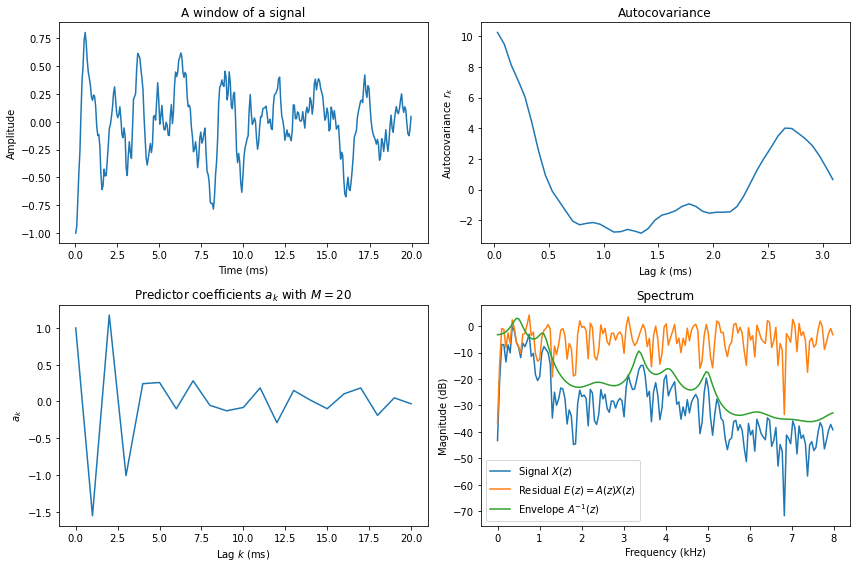

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.linalg import solve_toeplitz
from scipy.signal import resample
import scipy


target_fs = 16000

# read from storage
filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)
data = resample(data, int(len(data)*target_fs/fs))
fs = target_fs

lpc_length = int(1.25*fs/1000)
window_length_ms = 20
window_length = int(np.round(fs*window_length_ms/1000))

n = np.linspace(0.5,window_length-0.5,num=window_length)

windowpos = np.random.randint(int((len(data)-window_length)))
window_function = np.sin( np.pi*n/window_length)**2


datawin = data[windowpos:(windowpos+window_length)]
datawin = datawin/np.max(np.abs(datawin)) # normalize

# The autocorrelation of a signal is the convolution with itself r_k = x_n * x_{-n}
# which in turn is in the z-domain R(z) = |X(z)|^2. It follows that a simple way to
# calculate the autocorrelation is to take the DFT, absolute, square, and inverse-DFT.

X = scipy.fft.fft(datawin*window_function)
autocovariance = np.real(scipy.fft.ifft(np.abs(X)**2))
b = np.zeros([lpc_length+1,1])
b[0] = 1.
a = solve_toeplitz(autocovariance[0:lpc_length+1], b)
a = a/a[0]
A = scipy.fft.fft(a[:,0],n=window_length)
f = np.linspace(0,fs/1000,num=window_length)
fftlength = window_length//2

plt.figure(figsize=(12,8))
plt.subplot(221)
plt.plot(n*1000/fs,datawin)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('A window of a signal')
plt.subplot(222)
plt.plot(n[0:50]*1000/fs,autocovariance[0:50])
plt.xlabel('Lag $k$ (ms)')
plt.ylabel('Autocovariance $r_k$')
plt.title('Autocovariance')
plt.subplot(223)
plt.plot(a)
plt.xlabel('Lag $k$ (ms)')
plt.ylabel('$a_k$')
plt.title(r'Predictor coefficients $a_k$ with $M=$' + str(lpc_length))
plt.subplot(224)
plt.plot(f[0:fftlength],20.*np.log10(np.abs(X[0:fftlength]/np.max(np.abs(X)))),label='Signal $X(z)$')
plt.plot(f[0:fftlength],20.*np.log10(np.abs(X[0:fftlength]*A[0:fftlength])),label='Residual $E(z)= A(z)X(z)$')
plt.plot(f[0:fftlength],3-20.*np.log10(np.abs(A[0:fftlength]/np.min(np.abs(A)))),label='Envelope $A^{-1}(z)$')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude (dB)')
plt.title('Spectrum')
plt.legend()
plt.tight_layout()
plt.show()


Above, we calculate the autocovariance of a random segment of a speech signal. We then calculate the corresponding predictor coefficients $a_k$ with some model order $M$. The parameter coefficients are an abstract representation of the signal and it is generally hard to find any heuristic interpretation of the coefficients. The final panel illustrates the spectra of the signal and its envelope. We can see that the envelope follows closely the peaks of the signal. Here the envelope has been moved vertically to align approximately with the peaks, so the important observation is that the *shape* of the envelope follows the shape of the peaks. The absolute value (overall elevation) of the envelope is not here meaningful. Finally, we can observe that the spectrum of the residual $e_n=a_n*x_n$ is approximately flat, that is, $e_n$ is approximately white noise (statistically uncorrelated noise). 


## Physiological interpretation and model order

Linear prediction has a surprising connection with physical modelling of [speech production](Speech_production_and_acoustic_properties). Namely, a linear predictive model is equivalent with a *tube-model of the vocal tract* (see figure on the right). A useful consequence is that from the acoustic properties of such a tube-model, we can derive a relationship between the physical length of the vocal tract $L$ and the number of parameters $M$ of the corresponding linear predictor as

$$ M = \frac{2f_sL}c, $$

where $f_{s}$ is the sampling frequency and $c$ is the speed of sound. With an air-temperature of 35 C (approximate temperature of air flowing out from the mouth), the speed of sound is $c$=350m/s. The mean length of vocal tracts for females and males are approximately 14.1 and 16.9 cm. We can then choose to overestimate $L$=0.17m. At a sampling frequency of 16kHz, this gives $ M\approx 17 $ . The linear predictor will catch also features of the glottal oscillation and lip radiation, such that a useful approximation is $ M\approx{\text{round}}\left(1.25\frac{f_s}{1000}\right) $ . For different sampling rates we then get the number of parameters $M$ as

  

| Sampling rate $f_{s}$ | Model order $M$ |
|-----------|-----|
| 8 kHz     | 10  |
| 12.8 kHz  | 16  |
| 16 kHz    | 20  |


  

Observe however that even if a tube-model is equivalent with a linear predictor, the relationship is non-linear and highly sensitive to small errors. Moreover, when estimating linear predictive models from speech, in addition to features of the vocal tract, we will also capture features of glottal oscillation and lip-radiation It is therefore very difficult to estimate meaningful tube-model parameters from speech. A related sub-field of speech analysis is [glottal inverse filtering](../Analysis/Inverse_filtering_for_glottal_activity_estimation.md), which attempts to estimate the glottal source from the acoustic signal. A necessary step in such inverse filtering is to estimate the acoustic effect of the vocal tract, that is, it is necessary to estimate the tube model.


A tube model of the vocal tract consisting of constant-radius
tube-segments

![tubemodel](attachments/149889201.png)

## Uses in speech coding

Linear prediction has been highly influential especially in early speech
coders. In fact, the dominant speech coding method is [code-excited
linear prediction (CELP)](Code-excited_linear_prediction_CELP_), which
is based on linear prediction.



## Alternative representations (advanced topic)

Suppose scalars $a_{m,k}$, are the coefficients of an $M$th
order linear predictor. Coefficients of consecutive orders $M$ and $M+1$
are then related as

$$ a_{M+1,k} = a_{M,k} + \gamma_{M+1} a_{M,M+1-k}, $$

where the real valued scalar $ \gamma_{M}\in(-1,+1) $ is the
$M$th [reflection
coefficient](https://en.wikipedia.org/wiki/Reflection_coefficient). This
formulation is the basis for the [Levinson-Durbin
algorithm](https://en.wikipedia.org/wiki/Levinson_recursion) which can
be used to solve the linear predictive coefficients. In a physical
sense, reflection coefficients describe the amount of the acoustic wave
which is reflected back in each junction of the tube-model. In other
words, there is a relationship between the *cross-sectional areas*
$S_{k}$ of each tube-segment and the reflection coefficients as

$$ \gamma_k = \frac{S_k - S_{k+1}}{S_k + S_{k+1}}. $$

Furthermore, the logarithmic ratio of cross-sectional areas, also known
as the [*log-area
ratios*](https://en.wikipedia.org/wiki/Log_area_ratio), are defined as

$$ A_k = \log\frac{S_k}{S_{k+1}} =
\log\frac{1-\gamma_k}{1+\gamma_k}. $$

This form has been used in coding of linear predictive models, but is
today mostly of historical interest.

  